In [23]:
import numpy as np
import os

os.environ["Q_ALCHEMY_API_KEY"] = "please_add_it_here"

In [24]:
def plot_digits(digits, labels, text, matrix_dim):
    import matplotlib.pyplot as plt

    _, axes = plt.subplots(nrows=1, ncols=len(digits), figsize=(10, 3))
    for ax, digit, label in zip(axes, digits, labels):
        ax.set_axis_off()
        image = digit[:int(matrix_dim**2)].reshape(matrix_dim, matrix_dim)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
        ax.set_title(label)

    plt.show()

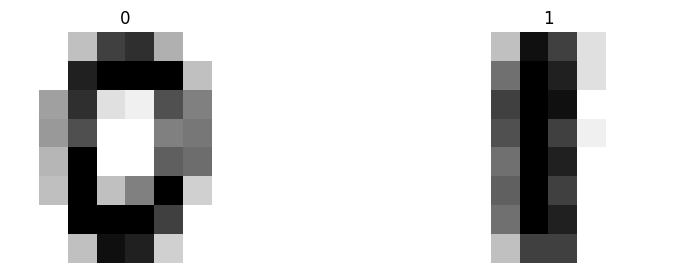

In [25]:
from qclib.machine_learning.datasets import digits

sample_total, training_input, test_input, class_labels = digits.load(
    classes=[0, 1], training_size=1, test_size=1
)
zero = training_input[0][0]
one = training_input[1][0]
plot_digits([zero, one], [0, 1], "test", 8)

# Looking at the 0

In [26]:
from q_alchemy.qiskit import QAlchemyInitialize

sp_org = QAlchemyInitialize(zero, opt_params={'max_fidelity_loss':0.0})
sp_org.definition.draw(fold=-1)

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                 ├
     │  LRSP(0,0,0.059873,0.17962,0.19459,0.074842,0,0,0,0,0.20956,0.23949,0.23949,0.23949,0.059873,0,0,0.08981,0.19459,0.029937,0.014968,0.16465,0.11975,0,0,0.095797,0.16465,0,0,0.11975,0.12773,0,0,0.068427,0.23949,0,0,0.14968,0.13685,0,0,0.059873,0.23949,0.059873,0.11975,0.23949,0.044905,0,0,0,0.23949,0.23949,0.23949,0.17962,0,0,0,0,0.059873,0.22453,0.20956,0.044905,0,0) │
q_3: ┤3                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                                                                                                                                                                                  │
q_4: ┤4                                                                                                                                                                                                                                                                                                                                                                                 ├
     │                                                                                                                                                                                                                           

In [27]:
from qiskit import transpile

qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
qc.draw(fold=-1)

global phase: π/2
     ┌──────────────┐                 ┌──────────────┐┌────────┐     ┌─────────────┐ ┌──────────┐                         ┌──────────┐  ┌────────────┐                       ┌────────┐  ┌─────────────┐                                                                                        ┌────────────┐   ┌────────────┐  ┌──────────────┐       ┌─────────┐   ┌─────────────┐                    ┌─────────────┐ ┌────────────┐┌──────────────┐                                                         ┌────────────┐ ┌────────────┐┌─────────────┐                                             ┌─────────────┐                                     ┌─────────┐  ┌─────────────┐                    ┌────────────┐ ┌────────────┐ ┌─────────────┐                                                  
q_0: ┤ Ry(0.020625) ├────────■────────┤ Ry(-0.91003) ├┤ Rz(-π) ├──■──┤ Ry(-2.0071) ├─┤ Rz(-π/2) ├────────────────────■────┤ Rz(-π/2) ├──┤ Ry(2.9675) ├─────────────────■─────┤ Rz(-π) ├──┤ Ry(-2.2658) ├────────■──────────────────────────────────────────────────────────────────────■────────┤ Rz(1.8348) ├───┤ Ry(1.1389) ├──┤ Rz(-0.16847) ├──■────┤ Rz(π/2) ├───┤ Ry(-2.3626) ├─────────────────■──┤ Rz(0.12777) ├─┤ Ry(1.3308) ├┤ Rz(-0.80122) ├──■──────────────────────────────────────────────────■───┤ Rz(1.6764) ├─┤ Ry(1.3885) ├┤ Rz(0.27721) ├─────────────────────────────────────■───────┤ Rx(0.78305) ├────────────────────────────────■────┤ Rz(π/2) ├──┤ Ry(0.12488) ├─────────────────■──┤ Rz(2.9382) ├─┤ Ry(1.3733) ├─┤ Rz(0.80563) ├──────────────────────────────────────────────────
     └──────────────┘      ┌─┴─┐      ├──────────────┤├────────┤  │  └─────────────┘┌┴──────────┴┐┌───────────────┐┌─┴─┐ ┌┴──────────┴┐ ├────────────┤┌─────────────┐┌─┴─┐┌──┴────────┴─┐├─────────────┤        │                                 ┌──────────────┐┌────────────┐       │       ┌┴────────────┤   └────────────┘  └──────────────┘┌─┴─┐┌─┴─────────┴─┐ └┬────────────┤┌─────────────┐┌─┴─┐├─────────────┤ ├────────────┤└┬────────────┬┘  │                                                  │   └────────────┘ └────────────┘├─────────────┤┌────────────┐┌─────────────┐      ┌─┴─┐     ├─────────────┤ ┌────────────┐ ┌────────────┐┌─┴─┐ ┌┴─────────┴─┐└┬────────────┤┌─────────────┐┌─┴─┐├───────────┬┘ ├────────────┤ └┬────────────┤                                                  
q_1: ──────────────────────┤ X ├──────┤ Ry(-0.25665) ├┤ Rz(-π) ├──┼─────────■───────┤ Ry(2.5258) ├┤ Rx(-0.036905) ├┤ X ├─┤ Rz(1.6068) ├─┤ Ry(1.5994) ├┤ Rz(-2.9129) ├┤ X ├┤ Rx(-1.5339) ├┤ Ry(-0.3994) ├────────┼───────────────────────────■─────┤ Rz(-0.12819) ├┤ Ry(1.3154) ├───────┼───────┤ Rz(0.50392) ├───────────────────────────────────┤ X ├┤ Rz(-1.6825) ├──┤ Ry(1.5236) ├┤ Rz(0.77154) ├┤ X ├┤ Rz(-1.5796) ├─┤ Ry(1.4333) ├─┤ Rz(2.9913) ├───┼────────────────────────■─────────────────────────┼────────────────────────■───────┤ Rz(-0.1389) ├┤ Ry(1.7636) ├┤ Rz(0.26935) ├──────┤ X ├─────┤ Rz(-2.7444) ├─┤ Ry(3.0464) ├─┤ Rz(1.9696) ├┤ X ├─┤ Rz(3.1402) ├─┤ Ry(1.5339) ├┤ Rz(-1.5339) ├┤ X ├┤ Rz(2.886) ├──┤ Ry(2.3449) ├──┤ Rz(1.4174) ├──────────────────────────────────────────────────
        ┌────────┐   ┌─────┴───┴─────┐└──────────────┘└────────┘  │         │       └────────────┘└───────────────┘└───┘ └────────────┘ └────────────┘└─────────────┘└───┘└─────────────┘└─────────────┘      ┌─┴─┐     ┌─────────────┐   ┌─┴─┐   ├──────────────┤└────────────┘     ┌─┴─┐     ├─────────────┴┐   ┌──────────┐                   └───┘└─────────────┘  └────────────┘└─────────────┘└───┘└─────────────┘ └────────────┘ └────────────┘ ┌─┴─┐ ┌────────────┐     ┌─┴─┐       ┌──────────┐  ┌─┴─┐┌──────────────┐    ┌─┴─┐     └─────────────┘└────────────┘└─────────────┘      └───┘     └─────────────┘ └────────────┘ └────────────┘└───┘ └────────────┘ └────────────┘└─────────────┘└───┘└───────────┘  └────────────┘  └────────────┘                                                  
q_2: ───┤ Rz(-π) ├───┤ Ry(-0.067477) ├────────────────────────────┼─────────┼

In [28]:
sp_low = QAlchemyInitialize(zero, opt_params={'max_fidelity_loss':0.1})
sp_low.definition.draw(fold=-1)

┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
q_0: ───────────────────────────┤0                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_1: ───────────────────────────┤1                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_2: ───────────────────────────┤2                                                                                                                                                                                                                               ├
     ┌─────────────────────────┐│  LRSP(0,0,-0.20105,-0.30907,-0.31975,-0.23435,-0.045245,0,0,-0.13644,-0.26319,-0.021349,-0.010674,-0.20791,-0.18192,0,0,-0.094042,-0.35177,-0.045245,-0.09049,-0.28772,-0.13153,0,0,0,-0.21603,-0.34046,-0.32915,-0.16203,0,0) │
q_3: ┤ LRSP(-0.68633,-0.72729) ├┤                                                                                                                                                                                                                                ├
     └─────────────────────────┘│                                                                                                                                                                                                                                │
q_4: ───────────────────────────┤3                                                                                                                                                                                                                               ├
                                │                                                                                                                                                                                                                                │
q_5: ───────────────────────────┤4                                                                                                                                                                                                                               ├
                                └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [29]:
qc_low = transpile(sp_low.definition, basis_gates=["rx", "ry", "rz", "cx", "id"])
qc_low.draw(fold=-1)

global phase: 4.2706
      ┌────────────┐                               ┌──────────────┐┌────────┐              ┌────────────┐                                             ┌─────────┐  ┌────────────────┐                               ┌─────────┐  ┌──────────────┐                                                                                                                                                                                                                     
q_0: ─┤ Ry(1.3066) ├───────────────────────■───────┤ Ry(-0.91879) ├┤ Rz(-π) ├──────■───────┤ Rx(1.4316) ├────────────────────────────────────■────────┤ Rz(π/2) ├──┤ Ry(-0.0071755) ├─────────────────────■─────────┤ Rz(π/2) ├──┤ Ry(-0.12668) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ┌┴────────────┴┐  ┌──────────┐        │       └──────────────┘└────────┘    ┌─┴─┐    ┌┴────────────┴┐┌────────────┐┌─────────────┐    ┌─┴─┐     ┌┴─────────┴─┐└─┬────────────┬─┘┌─────────────┐    ┌─┴─┐       ├─────────┤  └┬────────────┬┘                                                                                                                                                                                                                     
q_1: ┤ Ry(-0.47646) ├──┤ Rz(-π/2) ├────────┼─────────────────────────────────────┤ X ├────┤ Rz(-0.78506) ├┤ Ry(3.0894) ├┤ Rz(-2.3565) ├────┤ X ├─────┤ Rz(3.1402) ├──┤ Ry(1.5339) ├──┤ Rz(-1.5339) ├────┤ X ├───────┤ Rz(π/2) ├───┤ Ry(-1.961) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     └──────────────┘  └──────────┘      ┌─┴─┐       ┌──────────┐                └───┘    └──────────────┘└────────────┘└─────────────┘    └───┘     └────────────┘  └────────────┘  └─┬──────────┬┘┌───┴───┴────┐  └─────────┘   └───┬───┬────┘ ┌──────────┐┌──────────────┐┌───┐┌───────────────┐┌─────────┐┌───┐┌──────────────┐                                   ┌───┐┌──────────┐┌───────────────┐┌───┐┌──────────────┐┌─────────┐┌───┐┌─────────────┐┌────────┐
q_2: ────────────────────────────────────┤ X ├───────┤ Rz(-π/2) ├──────■───────────────────────────────────────────────────────────────────────────────────────────────────■───────────┤ Rz(-π/2) ├─┤ Ry(1.2778) ├────────────────────┤ X ├──────┤ Rx(-π/2) ├┤ Rz(-0.22154) ├┤ X ├┤ Rz(-0.091673) ├┤ Rx(π/2) ├┤ X ├┤ Ry(-0.12492) ├───────────────────────────────────┤ X ├┤ Rx(-π/2) ├┤ Rz(-0.021438) ├┤ X ├┤ Rz(0.083796) ├┤ Rx(π/2) ├┤ X ├┤ Ry(-3.0067) ├┤ Rz(-π) ├
      ┌────────────┐                     └───┘       └──────────┘      │                                                                                                   │           └──────────┘ └────────────┘                    └─┬─┘      └──────────┘└──────────────┘└─┬─┘└───────────────┘└─────────┘└─┬─┘└──────────────┘                                   └─┬─┘└──────────┘└───────────────┘└─┬─┘└──────────────┘└─────────┘└─┬─┘└─────────────┘└────────┘
q_3: ─┤ Ry(1.6287) ├───────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────┼──────────────────────────────────────┼────────────────────────────────┼───────────────────────────────────────────────────────┼─────────────────────────────────┼───────────────────────────────┼───────────────────────────
     ┌┴────────────┤ ┌─────────────┐ ┌────────────┐                    │                                      ┌───┐      ┌────────────┐┌────────────┐┌────────────┐      ┌─┴─┐       ┌─────────────┐┌────────────┐┌─────────────┐       │                                      │                                │    ┌──────────┐  ┌────────────┐┌─

In [30]:
sp_length = len(qc.get_instructions("cx"))
sp_low_length = len(qc_low.get_instructions("cx"))

print(f"The Full SP needs {sp_length} CX gates, while the Approximated SP (0.1) needs {sp_low_length} CX gates.")

The Full SP needs 32 CX gates, while the Approximated SP (0.1) needs 14 CX gates.


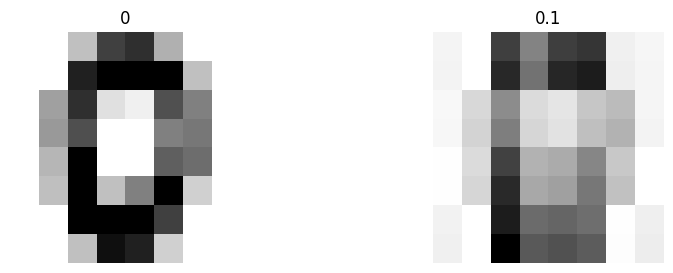

In [31]:
from qclib.util import get_state

zero_low = np.real(get_state(sp_low.definition)**2)
plot_digits([zero, zero_low], [0, 0.1], "test", 8)

# Looking at the 1

In [32]:
sp_org = QAlchemyInitialize(one, opt_params={'max_fidelity_loss':0.0})
sp_low = QAlchemyInitialize(one, opt_params={'max_fidelity_loss':0.1})

qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
qc_low = transpile(sp_low.definition, basis_gates=["rx", "ry", "rz", "cx", "id"])

sp_length = len(qc.get_instructions("cx"))
sp_low_length = len(qc_low.get_instructions("cx"))

print(f"The Full SP needs {sp_length} CX gates, while the Approximated SP (0.1) needs {sp_low_length} CX gates.")

The Full SP needs 29 CX gates, while the Approximated SP (0.1) needs 21 CX gates.


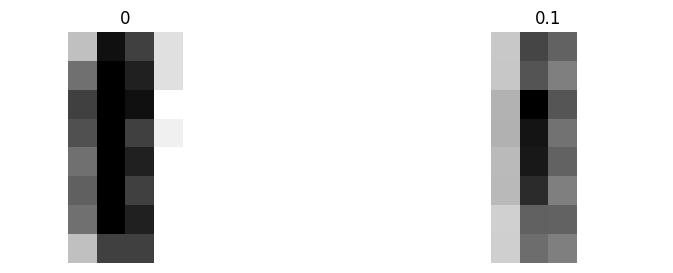

In [33]:
one_low = np.real(get_state(sp_low.definition)**2)
plot_digits([one, one_low], [0, 0.1], "test", 8)